In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def forword(x, w, b):
    # y = mx+b
    return np.dot(x, w.T) + b

In [3]:
w = np.array([
    [11,12],
    [21,22],
    [31,32]
])
x = np.array([1,2])
b = [1,2,3]
print(np.dot(x,w.T) + b)

forword(x,w,b)

[36 67 98]


array([36, 67, 98])

In [4]:
def relu(value):
   # in a list greater than or equal 0 number is returned as it is 
   # below 0 values are returned as 0
   # eg I/P -> [1,0,-1,-0.2,5] O/P -> [1,0,0,0,5]
   return list(map(lambda a: a if a > 0 else 0, value))

In [5]:
a = [-1,0,1,2,-0.1,5]
print(relu(a))

[0, 0, 1, 2, 0, 5]


In [6]:
def createData():

    N = 100 # number of points per class
    D = 2 # dimensionality
    K = 2 # number of classes
    X = np.zeros((N*K,D)) # data matrix (each row = single example)
    y = np.zeros(N*K, dtype='uint8') # class labels
    for j in range(K):
        ix = range(N*j,N*(j+1))
        r = np.linspace(0.0,1,N) # radius
        t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        y[ix] = j
    # lets visualize the data:
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
    plt.show()
    return X,y

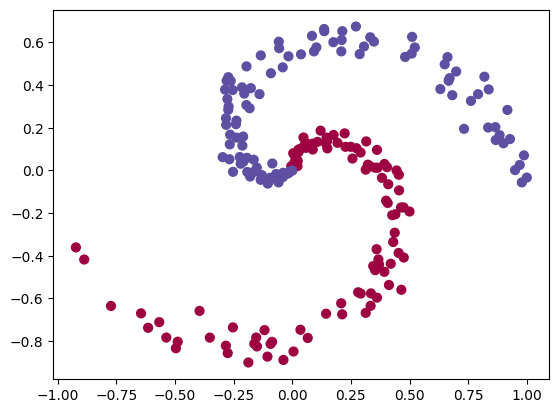

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
[-0.  0.] 0


In [7]:
x,y = createData()
print(type(x), type(y))
print(x[0], y[0])

Why want to use softmax activation function?  
a = [  
    [1,2],  
    [-9.4, 2],  
    [-0.9,-0.8]  
]  
when we use relu as activation function in output layer for 1st value (1,2) it gives value as (1,2) because both are positive  
in 2nd example (-9.4, 2) relu will give op as (0, 2), in 3rd example (-0.9,-0.8) relu will give op as (0,0).   

Here in 2nd and 3rd example we loss how accurate the model.   

To solve the poroblem when we use absolute value  
    |-9.4| = 9.4  
    |2| = 2  
    In this example we clearly see that -9.4 is changes to 9.4 in this case the negative one wrong class but when we use absolute the prediction is wrong  

To solve the problem when we use square value  
  -9.4 * -9.4 = 88.36    
  2 * 2 = 4  
  in this example alse we loss the meaning 



What we want is a probability between 0 to 1 and also we want to normalize negative value to smaller positive value   

in below 1st example we can compute propobility of all numbers to between 0 to 1  
in 2nd example below we can change negative value to smaller positive value using e  

In [8]:
# example 1
total = sum([1,3,7,4])
print(total)

# total is 15
# 1 is  0.06666666666666667 % of 15
print(1/15)
# 3 is  0.2 % of 15
print(3/15)
# 7 is  0.4666666666666667 % of 15
print(7/15)
# 4 is  0.26666666666666666 % of 15
print(4/15)

# when we add all percent it will give 1

print( 0.06666666666666667 + 0.2 + 0.4666666666666667 + 0.26666666666666666 )

def probability(n):
    total = sum(n)
    return list(map(lambda a: a/total, n))

probability([1,3,7,4])

15
0.06666666666666667
0.2
0.4666666666666667
0.26666666666666666
1.0


[0.06666666666666667, 0.2, 0.4666666666666667, 0.26666666666666666]

In [9]:
print(sum(probability([1,3,-7,4])))
print(sum(probability([1,-3,-7,4])))
print(sum(probability([-3,-7,-4])))


1.0
0.9999999999999998
1.0


In [10]:
#example 2
# e of -2 is 0.1353352832366127
# e of -100 is 3.720075976020836e-44
# e of 100 is 2.6881171418161356e+43
# e of 2 is 7.38905609893065
np.exp(2)

def e(value):
    return np.exp(value)

e([1,2,-9]) # [2.71828183e+00, 7.38905610e+00, 1.23409804e-04]

array([2.71828183e+00, 7.38905610e+00, 1.23409804e-04])

A soft max is combination of propability and e  

In [11]:
def softmax(value):
    value = np.exp(value)
    total = sum(value)
    return list(map(lambda a: a / total, value))

In [12]:
softmax([1,2,3])

[0.09003057317038046, 0.24472847105479767, 0.6652409557748219]

In [13]:
softmax([-0.5, 9,6,1])

[7.12740586786693e-05,
 0.9522019539883128,
 0.04740734378322976,
 0.00031942816977882605]

In [72]:
softmax([1, 1000, 20])

# here is one problem of floating point value 
#np.exp(1000)  it will cause inf run time error to over come this issue we implement another statergy

/tmp/ipykernel_5660/2236011895.py:2: RuntimeWarning: overflow encountered in exp
  value = np.exp(value)
/tmp/ipykernel_5660/2236011895.py:4: RuntimeWarning: invalid value encountered in double_scalars
  return list(map(lambda a: a / total, value))


[0.0, nan, 0.0]

To eliminate inf error find max value of list   
a = [1, 2, 3]  
max = 3  
subract each value with max  
a = [-2, -1, 0]  
and then proceed with older way  

In [87]:
def softmax(value):
    value = np.array(value) - max(value)
    value = np.exp(value)
    total = sum(value)
    return list(map(lambda a: a / total, value))

In [75]:
softmax([1,2,3]) # the result is same as the before

[0.09003057317038046, 0.24472847105479764, 0.6652409557748218]

In [76]:
softmax([-0.5, 9,6,1])

[7.127405867866931e-05,
 0.952201953988313,
 0.04740734378322978,
 0.00031942816977882616]

In [77]:
softmax([1, 1000, 20]) # here the problem is solved

[0.0, 1.0, 0.0]

In [88]:
softmax([1000, 1000, 200, -100])

[0.5, 0.5, 0.0, 0.0]